You want to group bars together by a second variable.

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.4     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
library(wakefield)


Attaching package: 'wakefield'


The following object is masked from 'package:dplyr':

    id




In [3]:
category1 <- race(100)

In [5]:
category2 <- sex(100)

In [6]:
levels(category1)

[1] "White"     "Hispanic"  "Black"     "Asian"     "Bi-Racial" "Native"   
[7] "Other"     "Hawaiian"

In [7]:
continuous1 <- age(100, 18:65)

In [8]:
df <- data.frame(race = category1, sex = category2, age = continuous1)

In [9]:
head(df)

,race,sex,age
,<fct>,<fct>,<int>
1,White,Female,25
2,White,Female,65
3,White,Female,35
4,White,Female,49
5,White,Male,63
6,Hispanic,Male,24


Don't know how to automatically pick scale for object of type variable/integer. Defaulting to continuous.



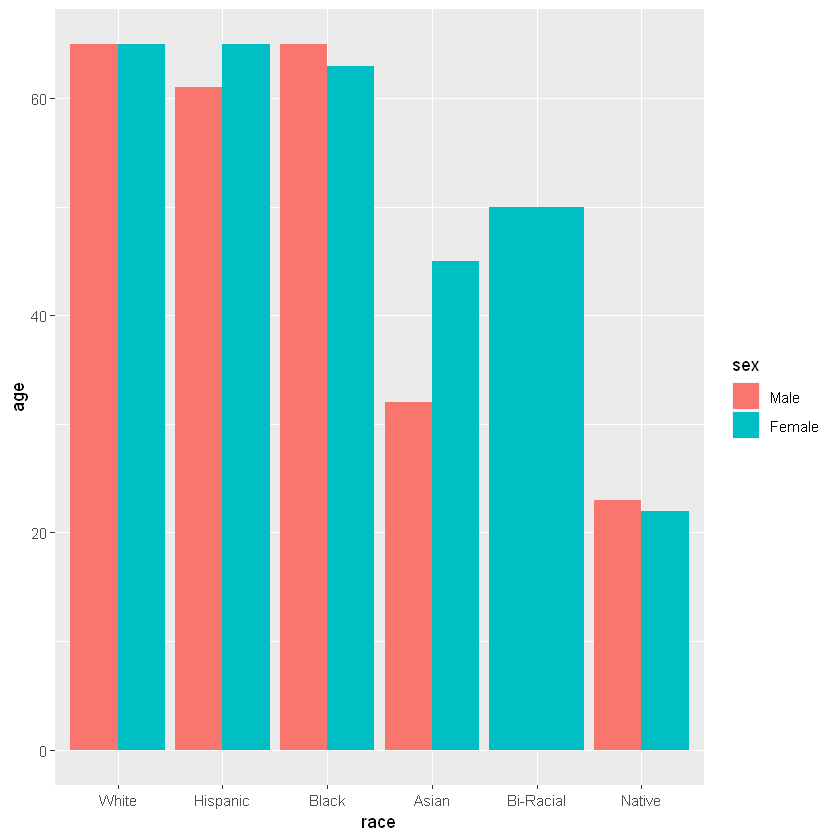

In [12]:
ggplot(df, aes(x = race, y = age, fill = sex)) + 
    geom_col(position = "dodge")

In [15]:
df %>%
    filter(race == "Bi-Racial", sex == "Male")

race,sex,age
<fct>,<fct>,<variable>


In [27]:
df %>%
    group_by(race, sex) %>%
    summarise(m = mean(age))

`summarise()` has grouped output by 'race'. You can override using the `.groups` argument.



race,sex,m
<fct>,<fct>,<dbl>
White,Male,42.09091
White,Female,43.53333
Hispanic,Male,37.71429
Hispanic,Female,45.87500
Black,Male,55.40000
Black,Female,43.57143
Asian,Male,32.00000
Asian,Female,29.75000
Bi-Racial,Female,38.50000


`summarise()` has grouped output by 'race'. You can override using the `.groups` argument.



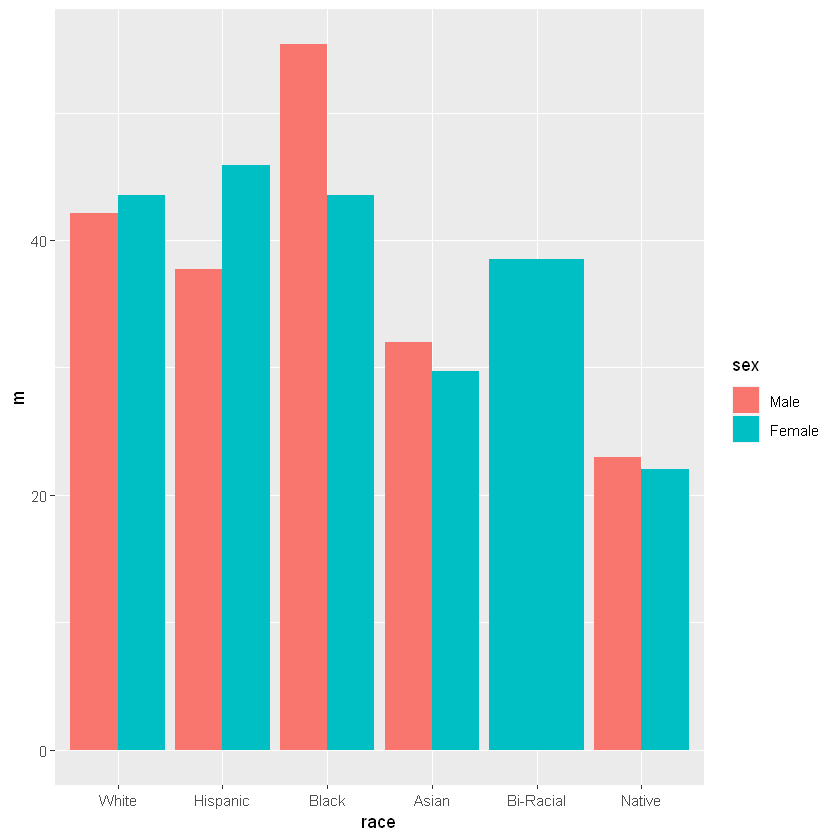

In [26]:
df %>%
    group_by(race, sex) %>%
    summarise(m = mean(age)) %>%
    ggplot(aes(x = race, y = m, fill = sex)) + 
    geom_col(position = "dodge")

`summarise()` has grouped output by 'race'. You can override using the `.groups` argument.



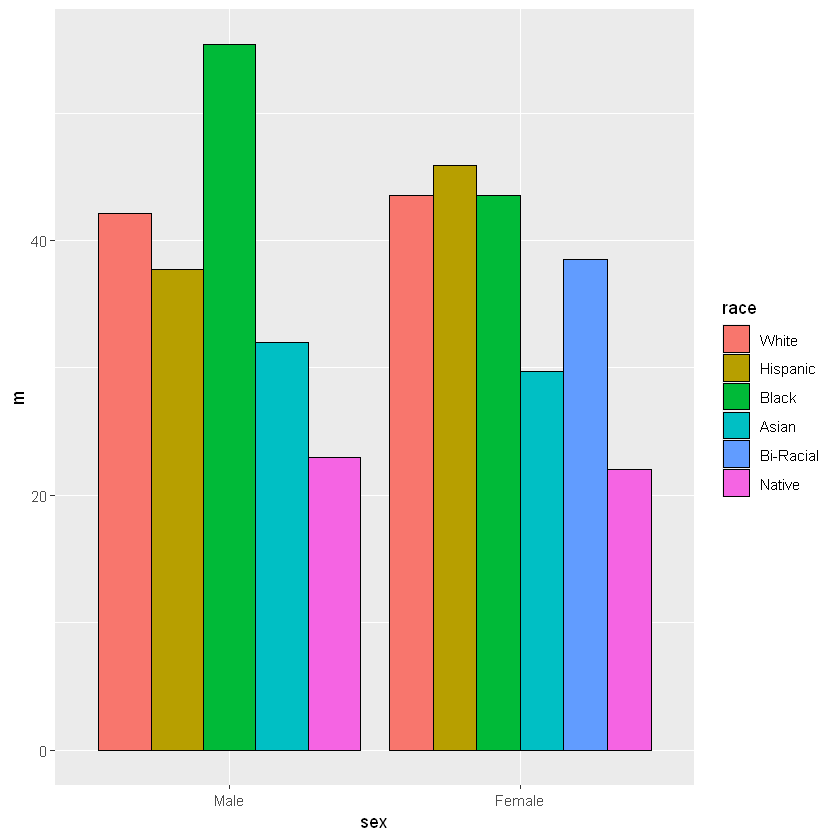

In [29]:
df %>%
    group_by(race, sex) %>%
    summarise(m = mean(age)) %>%
    ggplot(aes(x = sex, y = m, fill = race)) + 
    geom_col(position = "dodge", color = "black")

In [30]:
df %>% 
    group_by(race) %>%
    summarise(count = n())

race,count
<fct>,<int>
White,63
Hispanic,15
Black,12
Asian,6
Bi-Racial,2
Native,2


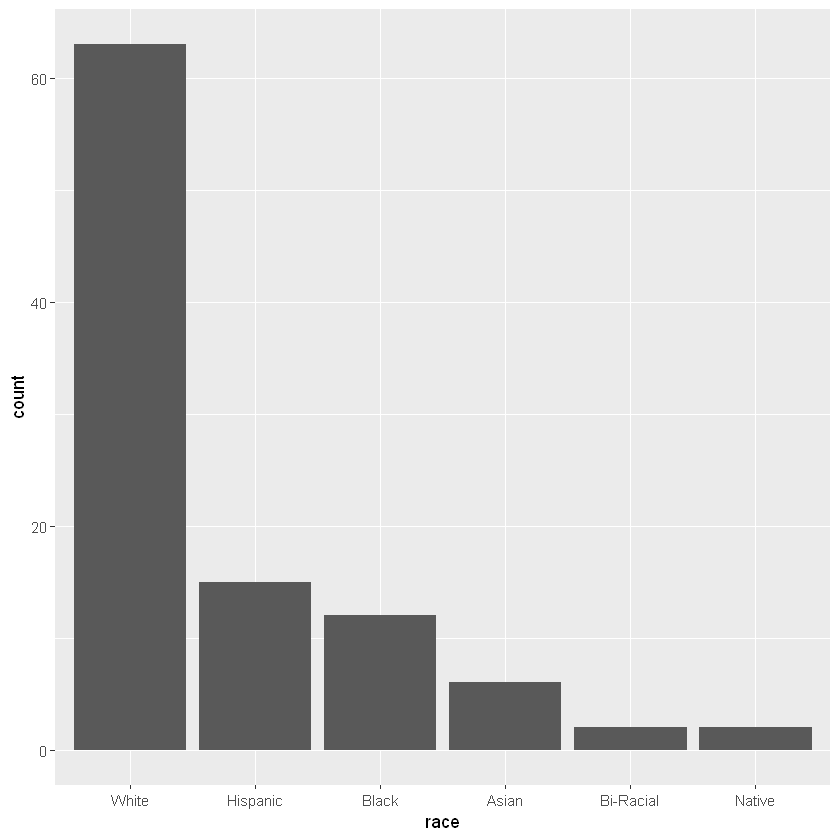

In [31]:
ggplot(df, aes(race)) + 
    geom_bar()